In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp '/content/drive/MyDrive/dataset.zip' .
!unzip dataset.zip

In [6]:
TRAIN_DIR = '/content/dataset/train'
TEST_DIR = '/content/dataset/test'

In [7]:
from tensorflow import keras
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='training', target_size=(100,100), shuffle=False)
validation_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='validation', target_size=(100,100), shuffle=False)
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = data_generator.flow_from_directory(TEST_DIR, color_mode='grayscale', batch_size = 32, target_size=(100,100), shuffle=False)

Found 1363 images belonging to 4 classes.
Found 582 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


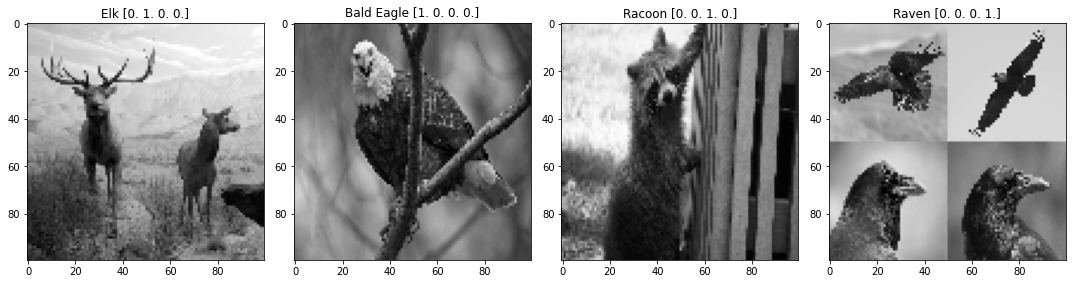

In [38]:
from matplotlib import pyplot as plot

images, labels = train_data.next()

plot.figure(figsize=(15,4))
im_label = {0:'Bald Eagle', 1:'Elk', 2:'Racoon', 3:'Raven'}
i = 1
for image, label in zip(images, labels):
  if label.argmax() in im_label:
    plot.subplot(1,4,i)
    plot.imshow(keras.preprocessing.image.array_to_img(image), cmap='gray')
    plot.title(im_label[label.argmax()] + ' '  + str(label))
    del im_label[label.argmax()]
    i += 1

plot.tight_layout()
plot.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


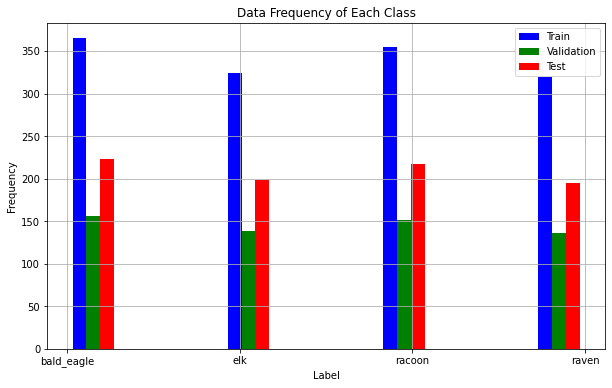

In [39]:
plot.figure(figsize=(10,6))
labels = (train_data.classes, validation_data.classes, test_data.classes)
plot.hist(labels, label=['Train', 'Validation', 'Test'], color=['b', 'g', 'r'])
plot.xlabel('Label')
plot.ylabel('Frequency')
plot.title('Data Frequency of Each Class')
loc = list(train_data.class_indices.values())
my_xticks = list(train_data.class_indices.keys())
plot.xticks(loc, my_xticks)
plot.legend()
plot.grid()
plot.show()

In [56]:
input_data = keras.layers.Input(shape=(100,100,1))

output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

main_model = keras.models.Model(inputs=input_data, outputs=output)
main_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
main_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_21 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_22 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_23 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________


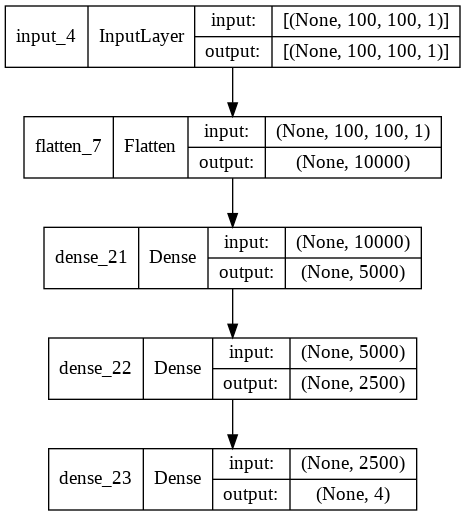

In [58]:
keras.utils.plot_model(main_model, show_shapes=True, expand_nested=True)

In [59]:
main_history = main_model.fit(train_data, validation_data=validation_data, epochs=10)

Epoch 1/10
11/43 [======>.......................] - ETA: 31s - loss: 2.3566 - accuracy: 0.2727

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 62s 1s/step - loss: 1.5739 - accuracy: 0.3632 - val_loss: 1.3297 - val_accuracy: 0.2990
Epoch 2/10
43/43 [==============================] - 61s 1s/step - loss: 1.1571 - accuracy: 0.4960 - val_loss: 1.1564 - val_accuracy: 0.5069
Epoch 3/10
43/43 [==============================] - 61s 1s/step - loss: 1.1014 - accuracy: 0.5341 - val_loss: 1.0849 - val_accuracy: 0.5172
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 1.0357 - accuracy: 0.5525 - val_loss: 1.0609 - val_accuracy: 0.5361
Epoch 5/10
43/43 [==============================] - 61s 1s/step - loss: 0.9684 - accuracy: 0.6163 - val_loss: 1.0908 - val_accuracy: 0.4948
Epoch 6/10
43/43 [==============================] - 61s 1s/step - loss: 0.9441 - accuracy: 0.6082 - val_loss: 0.9888 - val_accuracy: 0.5928
Epoch 7/10
43/43 [==============================] - 61s 1s/step - loss: 0.9224 - accuracy: 0.6346 - val_loss: 0.9145 - val_accuracy: 0.6615
Epoch 8/10
43/43 [=============

In [50]:
import numpy
from sklearn.metrics import classification_report 

def model_fit_info(model_, model_history, train, test):

    train_pred = model_.predict(train)
    valid_pred = model_.predict(test)

    print("Train:")
    print(classification_report(numpy.argmax(numpy.array(train_pred), axis = 1), numpy.array(train_data.classes)))
    print("Test:")
    print(classification_report(numpy.argmax(numpy.array(valid_pred), axis = 1), numpy.array(validation_data.classes)))

    plot.figure(figsize=(10,4))

    plot.subplot(1,2,1)
    plot.plot(model_history.history['accuracy'], color = 'c', label='Train')
    plot.plot(model_history.history['val_accuracy'], color = 'm', label='Test')
    plot.title('Model Accuracy')
    plot.ylabel('Accuracy')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.subplot(1,2,2)
    plot.plot(model_history.history['loss'], color = 'c', label='Train')
    plot.plot(model_history.history['val_loss'], color = 'm', label='Test')
    plot.title('Model Loss')
    plot.ylabel('Loss')
    plot.xlabel('Epoch')
    plot.legend()
    plot.grid()

    plot.tight_layout()
    plot.show()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train:
              precision    recall  f1-score   support

           0       0.47      0.25      0.33       678
           1       0.20      0.20      0.20       326
           2       0.05      0.27      0.08        60
           3       0.25      0.27      0.26       299

    accuracy                           0.24      1363
   macro avg       0.24      0.25      0.22      1363
weighted avg       0.34      0.24      0.27      1363

Test:
              precision    recall  f1-score   support

           0       0.56      0.29      0.38       303
           1       0.20      0.19      0.19       141
           2       0.07      0.43      0.11        23
           3       0.19      0.23      0.21       115

    accuracy                           0.26       582
   macro avg       0.25      0.28      0.22       582
weighted avg       0.38      0.26      0.29       582



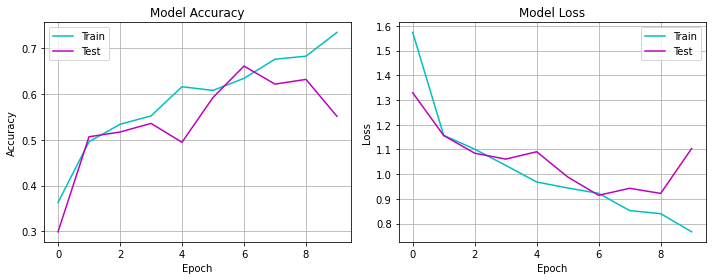

In [60]:
model_fit_info(main_model,main_history, train_data, validation_data)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_13 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_14 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 3/43 [=>...........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 1.8493 - accuracy: 0.3368 - val_loss: 1.2218 - val_accuracy: 0.4175
Epoch 2/10
43/43 [==============================] - 61s 1s/step - loss: 1.1961 - accuracy: 0.4600 - val_loss: 1.1387 - val_accuracy: 0.4553
Epoch 3/10
43/43 [==============================] - 61s 1s/step - loss: 1.1540 - accuracy: 0.4930 - val_loss: 1.1027 - val_accuracy: 0.5447
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 1.0955 - accuracy: 0.5092 - val_loss: 1.1099 - val_accuracy: 0.5670
Epoch 5/10
43/43 [==============================] - 61s 1s/step - loss: 1.0413 - accuracy: 0.5679 - val_loss: 1.1428 - val_accuracy: 0.4656
Epoch 6/10
43/43 [==============================] - 61s 1s/step - loss: 0.9995 - accuracy: 0.5877 - val_loss: 1.1630 - val_accuracy: 0.4553
Epoch 7/10
43/43 [==============================] - 61s 1s/step - loss: 0.9788 - accuracy: 0.5994 - val_loss: 1.0121 - val_accuracy: 0.5808
Epoch 8/10
43/43 [=============

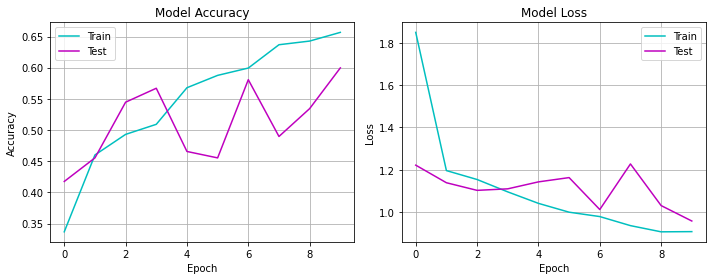

In [53]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='LeakyReLU')(output)
output = keras.layers.Dense(2500, activation='LeakyReLU')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_16 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_17 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
43/43 [==============================] - 62s 1s/step - loss: 1.7148 - accuracy: 0.2568 - val_loss: 1.5893 - val_accuracy: 0.3213
Epoch 2/10
43/43 [==============================] - 61s 1s/step - loss: 1.7542 - accuracy: 0.2685 - val_loss: 1.4741 - val_accuracy: 0.2612
Epoch 3/10
43/43 [==============================] - 61s 1s/step - loss: 1.6040 - accuracy: 0.2634 - val_loss: 1.4945 - val_accuracy: 0.3213
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 1.5888 - accuracy: 0.2861 - val_loss: 1.4041 - val_accuracy: 0.3127
Epoch 5/10
43/43 [==============================] - 61s 1s/step - loss: 1.4799 - accuracy: 0.3390 - val_loss: 1.4011 - val_accuracy: 0.3625
Epoch 6/10
43/43 [==============================] - 61s 1s/step - loss: 1.4094 - accuracy: 0.3294 - val_loss: 1.3665 - val_accuracy: 0.2938
Epoch 7/10
43/43 [==============================] - 61s 1s/step - loss: 1.4037 - accuracy: 0.3250 - val_loss: 1.3028 - val_accuracy: 0.3625
Epoch 8/10
43/43 [==

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

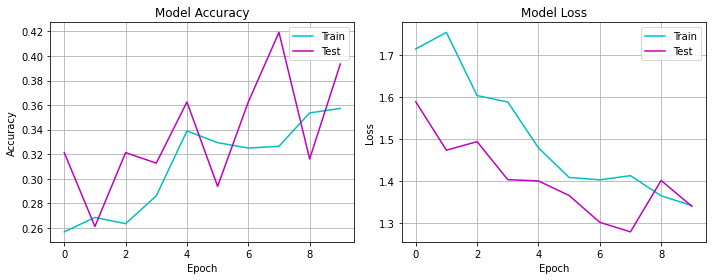

In [54]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='sigmoid')(output)
output = keras.layers.Dense(2500, activation='sigmoid')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_18 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_19 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_20 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
16/43 [==========>..................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 62s 1s/step - loss: 4.9286 - accuracy: 0.2561 - val_loss: 2.6193 - val_accuracy: 0.2887
Epoch 2/10
43/43 [==============================] - 61s 1s/step - loss: 2.0570 - accuracy: 0.3580 - val_loss: 1.9751 - val_accuracy: 0.3591
Epoch 3/10
43/43 [==============================] - 61s 1s/step - loss: 1.5705 - accuracy: 0.4160 - val_loss: 1.3304 - val_accuracy: 0.4588
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 1.3621 - accuracy: 0.4277 - val_loss: 1.7384 - val_accuracy: 0.3574
Epoch 5/10
43/43 [==============================] - 61s 1s/step - loss: 1.2521 - accuracy: 0.4857 - val_loss: 1.5862 - val_accuracy: 0.4055
Epoch 6/10
43/43 [==============================] - 61s 1s/step - loss: 1.1863 - accuracy: 0.5048 - val_loss: 1.2046 - val_accuracy: 0.4674
Epoch 7/10
43/43 [==============================] - 61s 1s/step - loss: 1.1473 - accuracy: 0.5304 - val_loss: 1.1079 - val_accuracy: 0.5034
Epoch 8/10
43/43 [=============

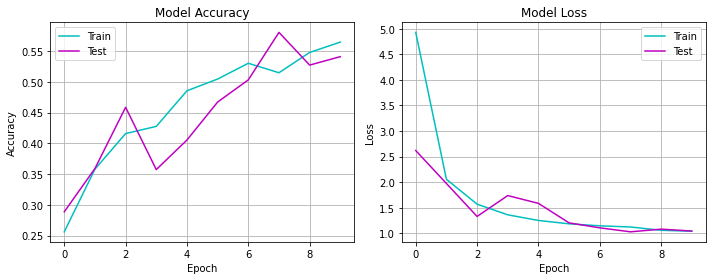

In [55]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='tanh')(output)
output = keras.layers.Dense(2500, activation='tanh')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(model,history, train_data, validation_data)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_24 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_25 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_26 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10/43 [=====>.......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 64s 1s/step - loss: 1.6485 - accuracy: 0.3786 - val_loss: 1.1817 - val_accuracy: 0.5017
Epoch 2/10
43/43 [==============================] - 62s 1s/step - loss: 1.1441 - accuracy: 0.5048 - val_loss: 1.1159 - val_accuracy: 0.5636
Epoch 3/10
43/43 [==============================] - 62s 1s/step - loss: 1.0806 - accuracy: 0.5444 - val_loss: 1.1098 - val_accuracy: 0.5275
Epoch 4/10
43/43 [==============================] - 62s 1s/step - loss: 0.9921 - accuracy: 0.5913 - val_loss: 1.0497 - val_accuracy: 0.5739
Epoch 5/10
43/43 [==============================] - 63s 1s/step - loss: 0.9299 - accuracy: 0.6537 - val_loss: 0.9955 - val_accuracy: 0.5567
Epoch 6/10
43/43 [==============================] - 62s 1s/step - loss: 0.8982 - accuracy: 0.6361 - val_loss: 1.3886 - val_accuracy: 0.4055
Epoch 7/10
43/43 [==============================] - 62s 1s/step - loss: 0.8683 - accuracy: 0.6801 - val_loss: 0.9223 - val_accuracy: 0.6478
Epoch 8/10
43/43 [=============

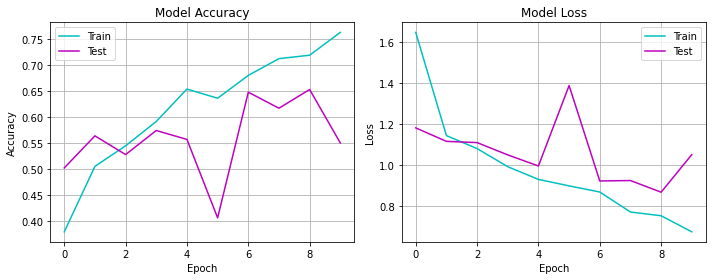

In [61]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_9 (Flatten)         (None, 10000)             0         
                                                                 
 dense_27 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_28 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_29 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/43 [========>....................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 64s 1s/step - loss: 1.6367 - accuracy: 0.3250 - val_loss: 1.3814 - val_accuracy: 0.3557
Epoch 2/10
43/43 [==============================] - 63s 1s/step - loss: 1.2225 - accuracy: 0.4175 - val_loss: 1.1351 - val_accuracy: 0.4656
Epoch 3/10
43/43 [==============================] - 63s 1s/step - loss: 1.1943 - accuracy: 0.4402 - val_loss: 1.1708 - val_accuracy: 0.4777
Epoch 4/10
43/43 [==============================] - 63s 1s/step - loss: 1.1185 - accuracy: 0.4872 - val_loss: 1.0398 - val_accuracy: 0.5498
Epoch 5/10
43/43 [==============================] - 63s 1s/step - loss: 1.0553 - accuracy: 0.5422 - val_loss: 1.1086 - val_accuracy: 0.5034
Epoch 6/10
43/43 [==============================] - 63s 1s/step - loss: 1.0576 - accuracy: 0.5282 - val_loss: 1.0507 - val_accuracy: 0.4845
Epoch 7/10
43/43 [==============================] - 62s 1s/step - loss: 0.9986 - accuracy: 0.5796 - val_loss: 1.0559 - val_accuracy: 0.5636
Epoch 8/10
43/43 [=============

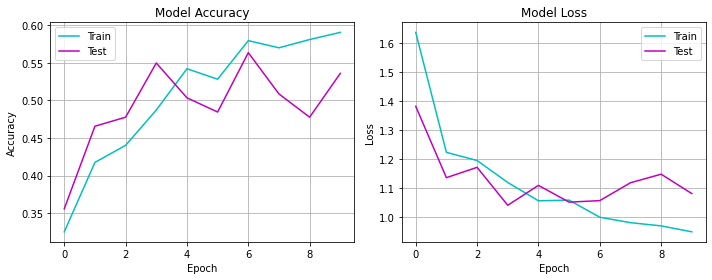

In [62]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_10 (Flatten)        (None, 10000)             0         
                                                                 
 dense_30 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_31 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_32 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 5/43 [==>.........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 66s 2s/step - loss: 9.0970 - accuracy: 0.2957 - val_loss: 1.2252 - val_accuracy: 0.3986
Epoch 2/10
43/43 [==============================] - 65s 2s/step - loss: 1.2018 - accuracy: 0.4351 - val_loss: 1.2612 - val_accuracy: 0.4588
Epoch 3/10
43/43 [==============================] - 65s 2s/step - loss: 1.1426 - accuracy: 0.4879 - val_loss: 1.1886 - val_accuracy: 0.4536
Epoch 4/10
43/43 [==============================] - 65s 2s/step - loss: 1.1239 - accuracy: 0.4996 - val_loss: 1.0612 - val_accuracy: 0.5550
Epoch 5/10
43/43 [==============================] - 65s 2s/step - loss: 1.0753 - accuracy: 0.5216 - val_loss: 1.0838 - val_accuracy: 0.5086
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 1.0881 - accuracy: 0.5238 - val_loss: 1.0545 - val_accuracy: 0.5069
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 1.0498 - accuracy: 0.5172 - val_loss: 1.0630 - val_accuracy: 0.5395
Epoch 8/10
43/43 [=============

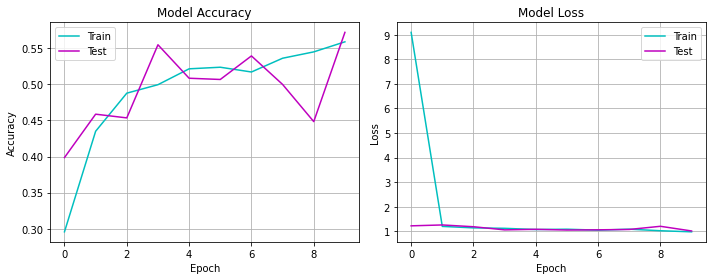

In [63]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

opt_model = keras.models.Model(inputs=input_data, outputs=output)
opt_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
opt_model.summary()
history = opt_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(opt_model,history, train_data, validation_data)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_33 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_34 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_35 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/43 [========>...................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 67s 2s/step - loss: 8.9349 - accuracy: 0.3118 - val_loss: 1.2756 - val_accuracy: 0.3797
Epoch 2/20
43/43 [==============================] - 65s 2s/step - loss: 1.2428 - accuracy: 0.4153 - val_loss: 1.1885 - val_accuracy: 0.4433
Epoch 3/20
43/43 [==============================] - 64s 1s/step - loss: 1.1679 - accuracy: 0.4373 - val_loss: 1.1500 - val_accuracy: 0.4639
Epoch 4/20
43/43 [==============================] - 64s 1s/step - loss: 1.2005 - accuracy: 0.4475 - val_loss: 1.1658 - val_accuracy: 0.4485
Epoch 5/20
43/43 [==============================] - 65s 2s/step - loss: 1.1019 - accuracy: 0.4930 - val_loss: 1.3009 - val_accuracy: 0.3969
Epoch 6/20
43/43 [==============================] - 65s 2s/step - loss: 1.0916 - accuracy: 0.5209 - val_loss: 1.3288 - val_accuracy: 0.4278
Epoch 7/20
43/43 [==============================] - 65s 2s/step - loss: 1.1116 - accuracy: 0.5018 - val_loss: 1.0896 - val_accuracy: 0.4914
Epoch 8/20
43/43 [=============

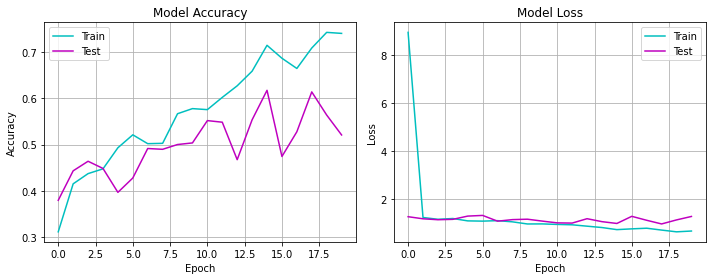

In [64]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

eopch_model = keras.models.Model(inputs=input_data, outputs=output)
eopch_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
eopch_model.summary()
history = eopch_model.fit(train_data, validation_data=validation_data, epochs=20)
model_fit_info(eopch_model,history, train_data, validation_data)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_13 (Flatten)        (None, 10000)             0         
                                                                 
 dense_39 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_40 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_41 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 1/43 [............................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 67s 2s/step - loss: 10.0250 - accuracy: 0.3008 - val_loss: 1.3098 - val_accuracy: 0.4192
Epoch 2/20
43/43 [==============================] - 65s 2s/step - loss: 1.2796 - accuracy: 0.4255 - val_loss: 1.1848 - val_accuracy: 0.4244
Epoch 3/20
43/43 [==============================] - 65s 2s/step - loss: 1.1707 - accuracy: 0.4622 - val_loss: 1.1446 - val_accuracy: 0.4811
Epoch 4/20
43/43 [==============================] - 65s 2s/step - loss: 1.1582 - accuracy: 0.4666 - val_loss: 1.2706 - val_accuracy: 0.3763
Epoch 5/20
43/43 [==============================] - 65s 2s/step - loss: 1.1482 - accuracy: 0.4864 - val_loss: 1.2531 - val_accuracy: 0.4811
Epoch 6/20
43/43 [==============================] - 65s 2s/step - loss: 1.1100 - accuracy: 0.4916 - val_loss: 1.1247 - val_accuracy: 0.5103
Epoch 7/20
43/43 [==============================] - 65s 2s/step - loss: 1.0758 - accuracy: 0.5326 - val_loss: 1.1844 - val_accuracy: 0.4553
Epoch 8/20
43/43 [============

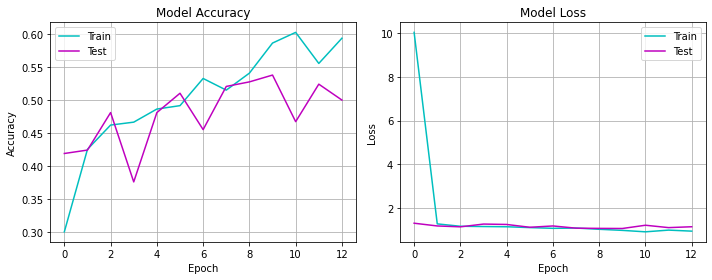

In [66]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

eopch_model = keras.models.Model(inputs=input_data, outputs=output)
eopch_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
es_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
eopch_model.summary()
history = eopch_model.fit(train_data, validation_data=validation_data, callbacks=[es_callback], epochs=20)
model_fit_info(eopch_model,history, train_data, validation_data)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_14 (Flatten)        (None, 10000)             0         
                                                                 
 dense_42 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_43 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_44 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
43/43 [==============================] - 67s 2s/step - loss: 0.3662 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 2/10
43/43 [==============================] - 65s 2s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 3/10
43/43 [==============================] - 65s 2s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 4/10
43/43 [==============================] - 65s 2s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 5/10
43/43 [==============================] - 65s 1s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 0.3698 - accuracy: 0.2605 - val_loss: 0.3694 - val_accuracy: 0.2612
Epoch 8/10
43/43 [==

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

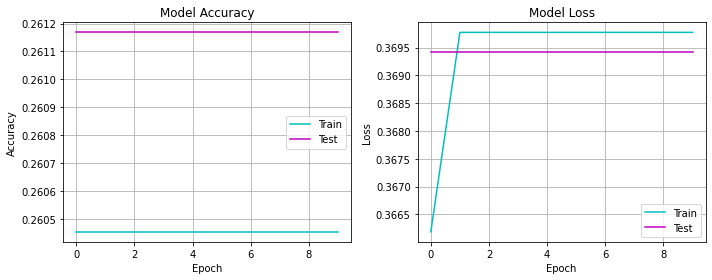

In [67]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

loss_model = keras.models.Model(inputs=input_data, outputs=output)
loss_model.compile(optimizer=keras.optimizers.Adam(), loss='MSE', metrics=['accuracy'])
loss_model.summary()
history = loss_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(loss_model,history, train_data, validation_data)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_17 (Flatten)        (None, 10000)             0         
                                                                 
 dense_51 (Dense)            (None, 5000)              50005000  
                                                                 
 dense_52 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_53 (Dense)            (None, 4)                 10004     
                                                                 
Total params: 62,517,504
Trainable params: 62,517,504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 7/43 [===>........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 78s 2s/step - loss: 59.7824 - accuracy: 0.2803 - val_loss: 29.4744 - val_accuracy: 0.2612
Epoch 2/10
43/43 [==============================] - 78s 2s/step - loss: 20.2185 - accuracy: 0.3302 - val_loss: 13.3148 - val_accuracy: 0.4210
Epoch 3/10
43/43 [==============================] - 74s 2s/step - loss: 10.1826 - accuracy: 0.3749 - val_loss: 7.7101 - val_accuracy: 0.4089
Epoch 4/10
43/43 [==============================] - 74s 2s/step - loss: 6.4423 - accuracy: 0.4021 - val_loss: 5.6002 - val_accuracy: 0.3522
Epoch 5/10
43/43 [==============================] - 74s 2s/step - loss: 4.9852 - accuracy: 0.3903 - val_loss: 4.5794 - val_accuracy: 0.4107
Epoch 6/10
43/43 [==============================] - 74s 2s/step - loss: 4.0823 - accuracy: 0.4431 - val_loss: 3.8023 - val_accuracy: 0.4124
Epoch 7/10
43/43 [==============================] - 75s 2s/step - loss: 3.6175 - accuracy: 0.4263 - val_loss: 3.3347 - val_accuracy: 0.4966
Epoch 8/10
43/43 [========

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

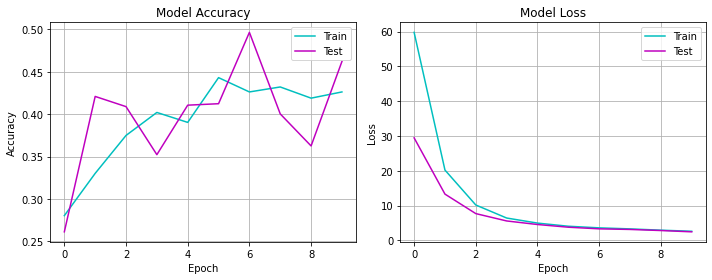

In [70]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu', kernel_regularizer='l2')(output)
output = keras.layers.Dense(2500, activation='relu', kernel_regularizer='l2')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

reg_model = keras.models.Model(inputs=input_data, outputs=output)
reg_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reg_model.summary()
history = reg_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(reg_model,history, train_data, validation_data)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_18 (Flatten)        (None, 10000)             0         
                                                                 
 dense_54 (Dense)            (None, 5000)              50005000  
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0         
                                                                 
 dense_55 (Dense)            (None, 2500)              12502500  
                                                                 
 dropout_3 (Dropout)         (None, 2500)              0         
                                                                 
 dense_56 (Dense)            (None, 4)                 100

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 67s 2s/step - loss: 10.0156 - accuracy: 0.3001 - val_loss: 1.2940 - val_accuracy: 0.3058
Epoch 2/10
43/43 [==============================] - 65s 2s/step - loss: 1.2548 - accuracy: 0.4079 - val_loss: 1.2511 - val_accuracy: 0.4622
Epoch 3/10
43/43 [==============================] - 65s 2s/step - loss: 1.2002 - accuracy: 0.4453 - val_loss: 1.2146 - val_accuracy: 0.4072
Epoch 4/10
43/43 [==============================] - 65s 2s/step - loss: 1.1564 - accuracy: 0.4461 - val_loss: 1.1231 - val_accuracy: 0.4966
Epoch 5/10
43/43 [==============================] - 65s 1s/step - loss: 1.1759 - accuracy: 0.4395 - val_loss: 1.1073 - val_accuracy: 0.4897
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 1.1130 - accuracy: 0.4857 - val_loss: 1.0879 - val_accuracy: 0.5069
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 1.1222 - accuracy: 0.4842 - val_loss: 1.1611 - val_accuracy: 0.4811
Epoch 8/10
43/43 [============

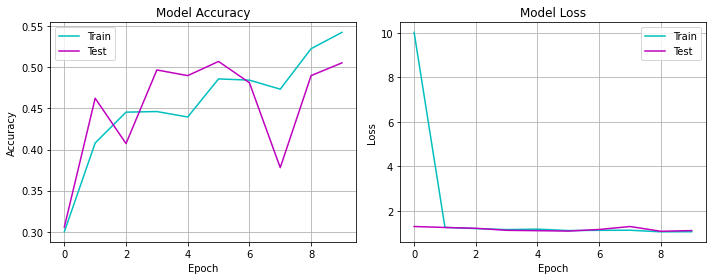

In [71]:
output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(5000, activation='relu')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(2500, activation='relu')(output)
output = keras.layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation='softmax')(output)

reg_model = keras.models.Model(inputs=input_data, outputs=output)
reg_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reg_model.summary()
history = reg_model.fit(train_data, validation_data=validation_data, epochs=10)
model_fit_info(reg_model,history, train_data, validation_data)

In [73]:
train_pred = main_model.predict(train_data)
test_pred = main_model.predict(test_data)

print("Train:")
print(classification_report(numpy.argmax(numpy.array(train_pred), axis = 1), numpy.array(train_data.classes)))
print("Test:")
print(classification_report(numpy.argmax(numpy.array(test_pred), axis = 1), numpy.array(test_data.classes)))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train:
              precision    recall  f1-score   support

           0       0.47      0.25      0.33       678
           1       0.23      0.23      0.23       326
           2       0.05      0.30      0.09        60
           3       0.24      0.25      0.24       299

    accuracy                           0.25      1363
   macro avg       0.25      0.26      0.22      1363
weighted avg       0.34      0.25      0.28      1363

Test:
              precision    recall  f1-score   support

           0       0.58      0.28      0.38       460
           1       0.22      0.25      0.23       174
           2       0.03      0.30      0.06        23
           3       0.22      0.24      0.23       176

    accuracy                           0.27       833
   macro avg       0.26      0.27      0.22       833
weighted avg       0.41      0.27      0.31       833

